In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#### 남성과 여성의 수를 barchart로 표현하시오

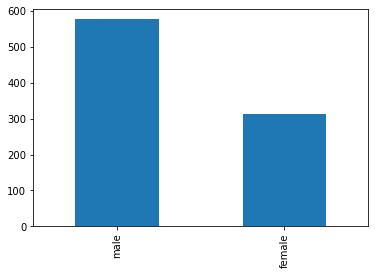

In [7]:
df.sex.value_counts().plot(kind = 'bar')

## countplot()

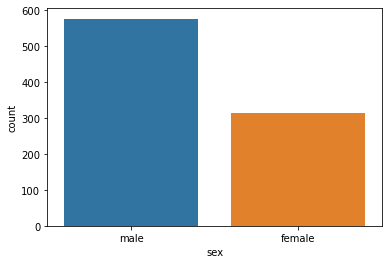

In [11]:
sns.countplot('sex', data=df)

In [55]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


###  null값 채우기

#### age col에 null 값을 pcclass(1,2,3) 각 클래스의 평균 연령으로 채우기

In [19]:
# pccclass 평균 연령구하기
df.groupby('class')['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [80]:
age_list= []        
g_c = df.groupby('class')['age'].mean()
for i in zip(df.age, df.pclass):
    if np.isnan(i[0]):       # isnan
        if i[1] == 1:
            j = g_c[0]
        elif i[1] == 2:
            j = g_c[1]
        else :
            j = g_c[2]

        age_list.append(j)
    else :
        age_list.append(i[0])
age_list

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 25.14061971830986,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 29.87763005780347,
 31.0,
 25.14061971830986,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 25.14061971830986,
 19.0,
 25.14061971830986,
 25.14061971830986,
 40.0,
 38.233440860215055,
 25.14061971830986,
 66.0,
 28.0,
 42.0,
 25.14061971830986,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 25.14061971830986,
 3.0,
 19.0,
 25.14061971830986,
 25.14061971830986,
 25.14061971830986,
 25.14061971830986,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 38.233440860215055,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 38.233440860215055,
 25.14061971830986,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 25.14061971830986,
 25.14061971830986,
 0.83,
 30.0,
 22.0,
 29.0,
 25.14061971830986,
 28.0,
 17.0,
 33.0,
 16.0,
 25.14061971830986,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 25.14061971830986,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 25.14061971

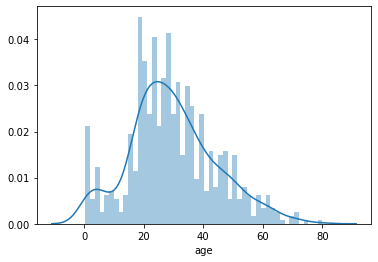

In [81]:
sns.distplot(df.age, bins = 50) # 20~40대

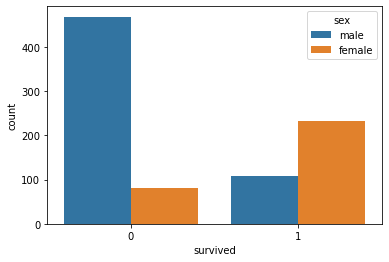

In [51]:
#살아남은 사람과 죽은사람의 비율
sns.countplot('survived',data=df,hue='sex')

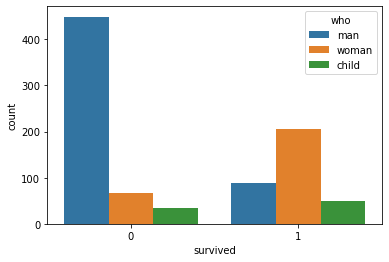

In [47]:
sns.countplot('survived',data=df,hue='who')

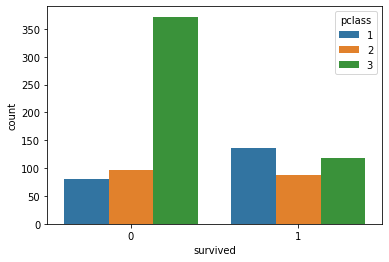

In [50]:
sns.countplot('survived',data=df,hue='pclass')

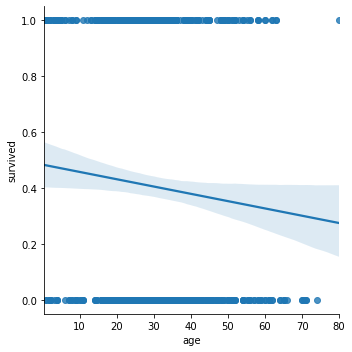

In [52]:
# 연령에 따른 생존분석
sns.lmplot(x='age',y = 'survived',data = df)

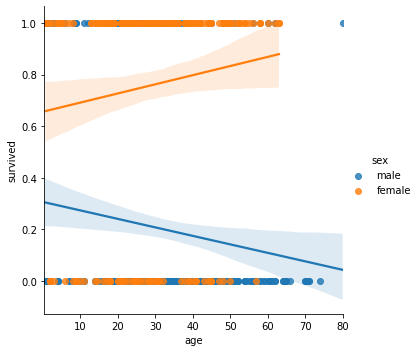

In [53]:
sns.lmplot(x='age',y = 'survived',data = df, hue='sex')

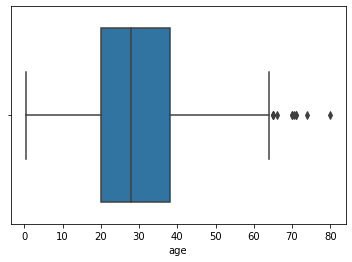

In [58]:
sns.boxplot('age',data=df)